In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/test.csv
/kaggle/input/nlp-getting-started/train.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from collections import defaultdict, Counter
import scipy.stats as stats
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from time import sleep
from tqdm.notebook import tqdm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from nltk.tokenize import word_tokenize
import gensim
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.preprocessing.text import one_hot
from keras.layers import LSTM,Embedding,Dense,Bidirectional,GlobalMaxPool2D,BatchNormalization,Dropout,TimeDistributed,GlobalMaxPool1D
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential,Model
from keras.layers import SpatialDropout1D,GRU
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from lightgbm import LGBMClassifier

In [3]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import plot_confusion_matrix, make_scorer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, KFold, StratifiedShuffleSplit
from sklearn.neighbors import DistanceMetric
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, LabelEncoder, Binarizer, OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import xgboost
from sklearn.linear_model import ElasticNet
import re
import sys
from time import sleep
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import joblib
import json
from sklearn.model_selection import ShuffleSplit
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import tensorflow as tf
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
%matplotlib inline

In [4]:
train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [5]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [8]:
test.dtypes

id           int64
keyword     object
location    object
text        object
dtype: object

EDA

In [9]:
print("Training Shape: {}".format(train.shape))
print("Test Shape: {}".format(test.shape))

Training Shape: (7613, 5)
Test Shape: (3263, 4)


In [10]:
train.isnull().sum(axis=0)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
train.isnull().sum(axis=1)[20:40]

20    2
21    2
22    2
23    2
24    2
25    2
26    2
27    2
28    2
29    2
30    2
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    1
39    0
dtype: int64

In [12]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [13]:
train[train['location'].isnull() == False]['location'].value_counts()

USA                               104
New York                           71
United States                      50
London                             45
Canada                             29
                                 ... 
victoria mozÌ£o                     1
Statute Of Limitations_             1
Central Illinois                    1
Stamford & Cork (& Shropshire)      1
Innsmouth, Mass.                    1
Name: location, Length: 3341, dtype: int64

In [14]:
test[test['location'].isnull() == False]['location'].value_counts()

New York                          38
USA                               37
Worldwide                         16
United States                     15
Canada                            13
                                  ..
dancer - Peter Pan panto 2015      1
301|804                            1
Merseyside                         1
Shrewsbury, England                1
Mumbai , India                     1
Name: location, Length: 1602, dtype: int64

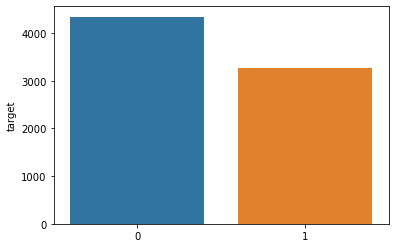

In [15]:
real_not_real = train['target'].value_counts()
sns.barplot(real_not_real.index, real_not_real)

In [16]:
train['text'].describe()

count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

Length of tweets vs Target

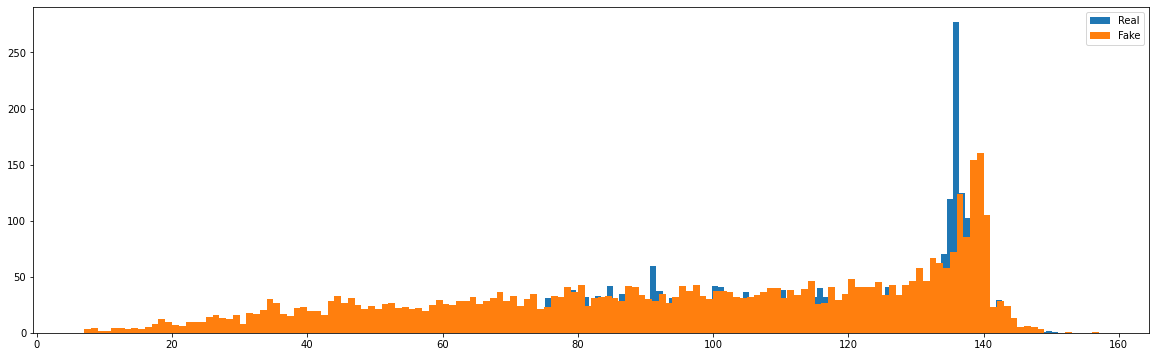

In [17]:
plt.figure(figsize=(20,6))
plt.hist(train[train.target == 1]['text'].str.len(), bins = 150, label = "Real")
plt.hist(train[train.target == 0]['text'].str.len(),bins = 150, label="Fake")
plt.legend()
plt.show()

Number of charatcers vs Target

Text(0.5, 0.98, 'Characters vs Target')

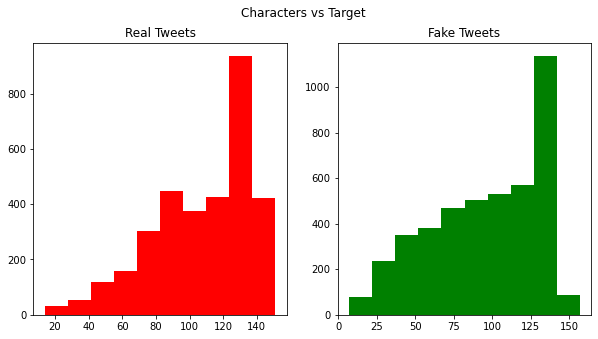

In [18]:
fig,(plt1,plt2) = plt.subplots(1,2, figsize = (10,5))
real = train[train['target'] == 1]['text'].str.len()
fake = train[train['target'] == 0]['text'].str.len()
plt1.hist(real, color="Red")
plt1.set_title("Real Tweets")
plt2.hist(fake,color="Green")
plt2.set_title("Fake Tweets")
plt.suptitle("Characters vs Target")

Text(0.5, 0.98, 'Words vs Target')

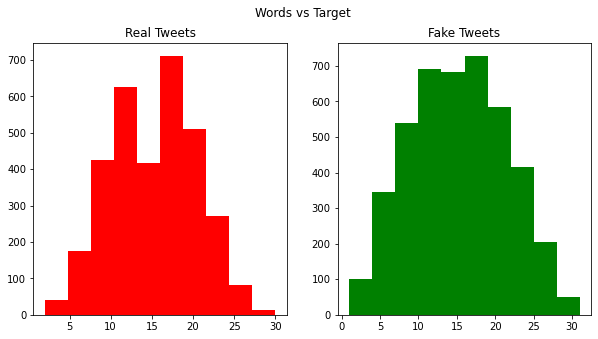

In [19]:
fig,(plt1,plt2) = plt.subplots(1,2, figsize = (10,5))
real = train[train['target'] == 1]['text'].str.split().map(lambda x: len(x))
fake = train[train['target'] == 0]['text'].str.split().map(lambda x: len(x))
plt1.hist(real, color="Red")
plt1.set_title("Real Tweets")
plt2.hist(fake,color="Green")
plt2.set_title("Fake Tweets")
plt.suptitle("Words vs Target")

Text(0.5, 0.98, 'Average word length vs Title')

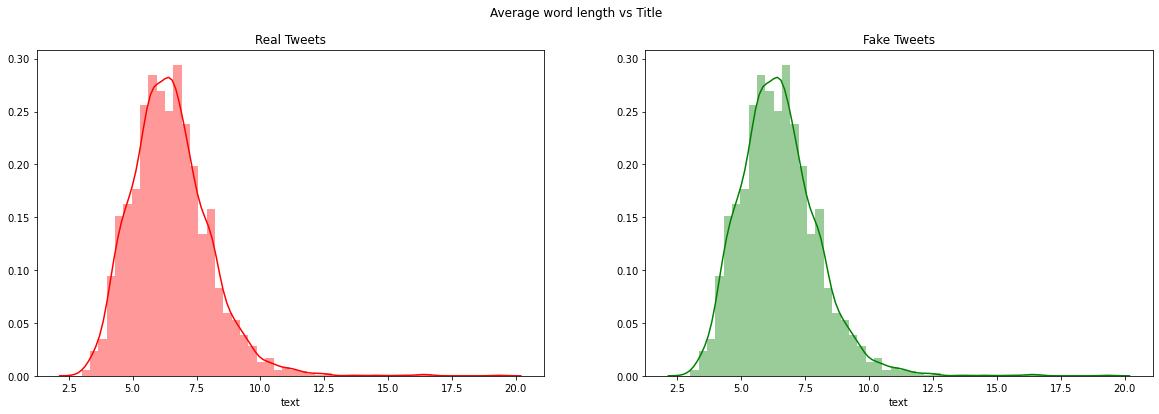

In [20]:
fig,(plt1,plt2) = plt.subplots(1,2, figsize = (20,6))
real = train[train['target'] == 1]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(real.map(lambda x: np.mean(x)), ax=plt1, color="Red", label="Real")
fake = train[train['target'] == 0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.distplot(real.map(lambda x: np.mean(x)), ax=plt2, color="Green")
plt1.set_title("Real Tweets")
plt2.set_title("Fake Tweets")
fig.suptitle("Average word length vs Title")

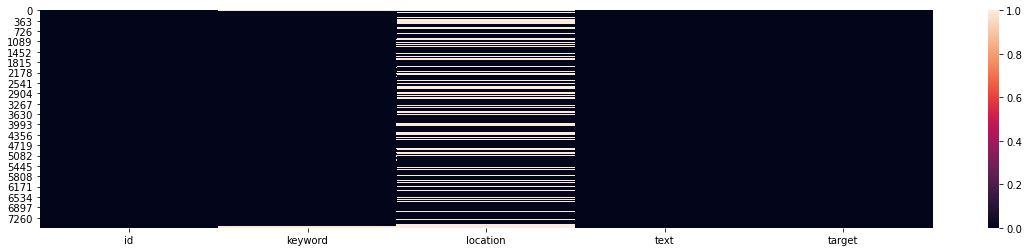

In [21]:
plt.figure(figsize=(20,4))
sns.heatmap(train.isnull())

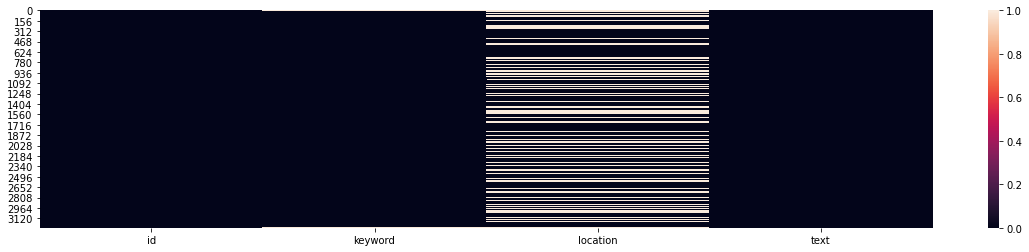

In [22]:
plt.figure(figsize=(20,4))
sns.heatmap(test.isnull())

* It seems that the location feature has been entered manually and not automatically generated 

**Analysing keywords Dist.**

***Mean Encodings***

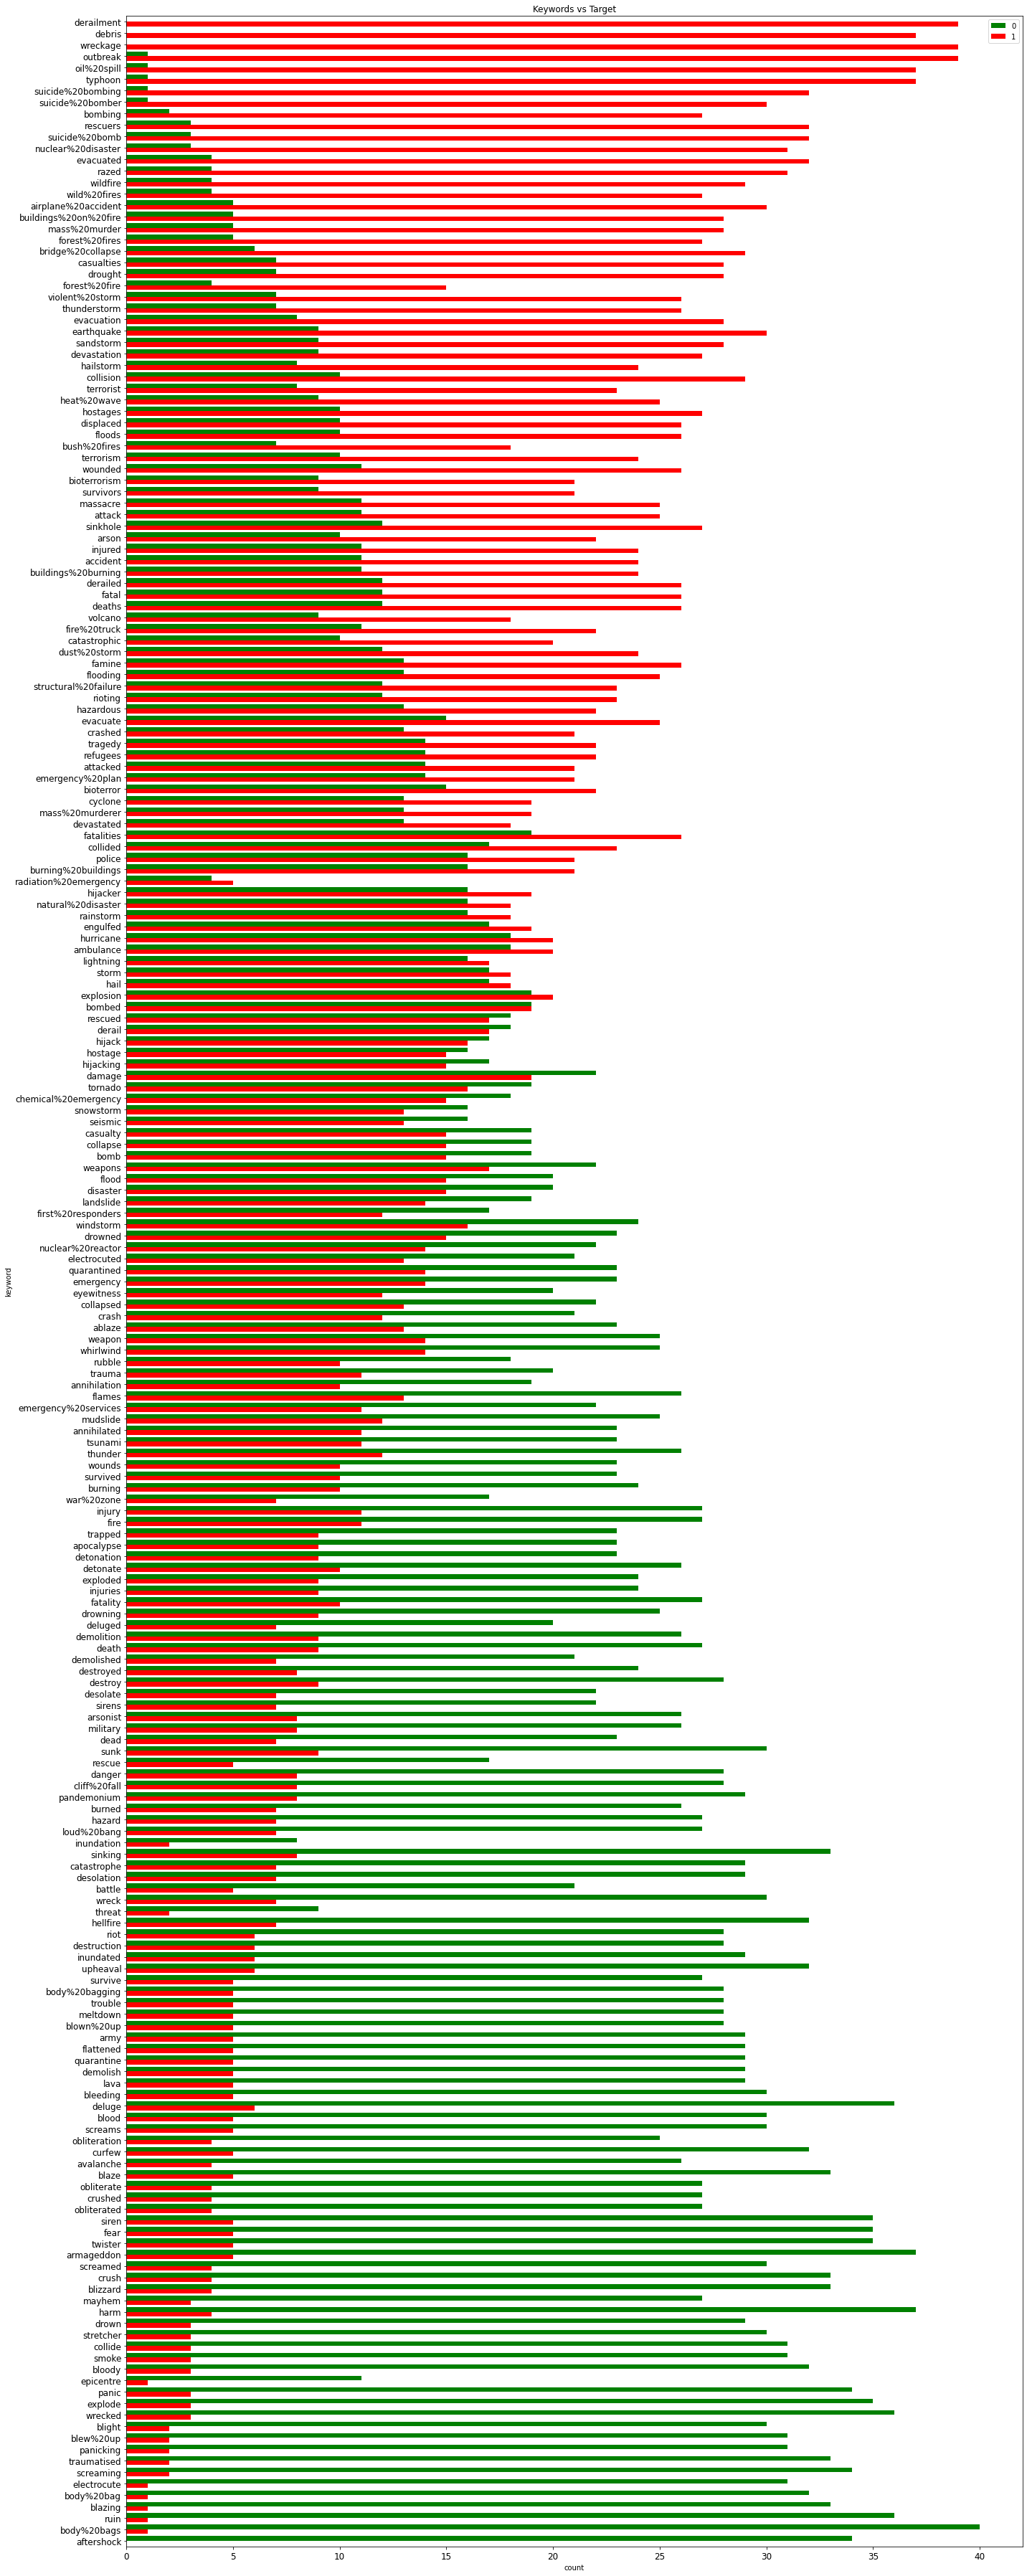

In [23]:
train['keyword'].fillna('no_keyword')
train['keyword_mean'] = train.groupby('keyword')['target'].transform('mean')
fig = plt.figure(figsize = (20,50))
sns.countplot(y = train.sort_values(by='keyword_mean', ascending = False)['keyword'], hue = train.sort_values(by = 'keyword_mean', ascending=False)['target'],palette=["green",'red'],saturation = 1)
plt.legend(loc = 1)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12)
plt.title('Keywords vs Target')
plt.tight_layout()
plt.show()

**Feature Engineering**

In [24]:
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['text'].apply(lambda x: len(str(x).split()))

train['char_count'] = train['text'].apply(lambda x: len(str(x)))
test['char_count'] = test['text'].apply(lambda x: len(str(x)))

train['stop_word_count'] = train['text'].apply(lambda x: len([word for word in str(x).lower().split() if word in stopwords.words('english')]))
test['stop_word_count'] = test['text'].apply(lambda x: len([word for word in str(x).lower().split() if word in stopwords.words('english')]))

train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test['text'].apply(lambda x: len(set(str(x).split())))

train['hashtag_count'] = train['text'].apply(lambda x: len([char for char in str(x) if char == '#']))
test['hashtag_count'] = test['text'].apply(lambda x: len([char for char in str(x) if char == '#']))

train['mention_count'] = train['text'].apply(lambda x: len([char for char in str(x) if char == '@']))
test['mention_count'] = test['text'].apply(lambda x: len([char for char in str(x) if char == '@']))

train['average_word_length'] = train['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
test['average_word_length'] = test['text'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

In [25]:
train.head()

,id,keyword,location,text,target,keyword_mean,word_count,char_count,stop_word_count,unique_word_count,hashtag_count,mention_count,average_word_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,NaN,13,69,6,13,1,0,4.384615
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,NaN,7,38,0,7,0,0,4.571429
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,NaN,22,133,11,20,0,0,5.090909
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,NaN,8,65,1,8,1,0,7.125000
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,NaN,16,88,7,15,2,0,4.500000


In [26]:
test.head()

,id,keyword,location,text,word_count,char_count,stop_word_count,unique_word_count,hashtag_count,mention_count,average_word_length
0,0,NaN,NaN,Just happened a terrible car crash,6,34,2,6,0,0,4.833333
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",9,64,2,9,1,0,6.222222
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",19,96,9,19,0,0,4.105263
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,4,40,0,4,2,0,9.250000
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,8,45,2,8,0,0,4.750000


In [27]:
train.describe()

,id,target,keyword_mean,word_count,char_count,stop_word_count,unique_word_count,hashtag_count,mention_count,average_word_length
count,7613.000000,7613.00000,7552.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000,7613.000000
mean,5441.934848,0.42966,0.427569,14.903586,101.037436,4.523184,14.340733,0.446999,0.362406,6.128494
std,3137.116090,0.49506,0.271177,5.732604,33.781325,3.419235,5.277160,1.099841,0.720097,1.675464
min,1.000000,0.00000,0.000000,1.000000,7.000000,0.000000,1.000000,0.000000,0.000000,2.250000
25%,2734.000000,0.00000,0.179487,11.000000,78.000000,2.000000,11.000000,0.000000,0.000000,4.875000
50%,5408.000000,0.00000,0.378378,15.000000,107.000000,4.000000,14.000000,0.000000,0.000000,5.928571
75%,8146.000000,1.00000,0.666667,19.000000,133.000000,7.000000,18.000000,0.000000,1.000000,7.058824
max,10873.000000,1.00000,1.000000,31.000000,157.000000,19.000000,29.000000,13.000000,8.000000,19.333333


In [28]:
test.describe()

,id,word_count,char_count,stop_word_count,unique_word_count,hashtag_count,mention_count,average_word_length
count,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000,3263.000000
mean,5427.152927,14.965369,102.108183,4.464603,14.407294,0.472878,0.392277,6.183041
std,3146.427221,5.783576,33.972158,3.361322,5.306016,1.090811,0.758739,1.685506
min,0.000000,1.000000,5.000000,0.000000,1.000000,0.000000,0.000000,2.500000
25%,2683.000000,11.000000,78.000000,2.000000,11.000000,0.000000,0.000000,4.952381
50%,5500.000000,15.000000,109.000000,4.000000,15.000000,0.000000,0.000000,6.000000
75%,8176.000000,19.000000,134.000000,7.000000,18.000000,0.000000,1.000000,7.100000
max,10875.000000,31.000000,151.000000,18.000000,28.000000,12.000000,10.000000,16.500000


In [29]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments
 
    # define figure size
    plt.figure(figsize=(16, 4))
 

 
    # Q-Q plot
    plt.subplot(1, 2, 1)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
 
    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
 
    plt.show()

******* word_count *******


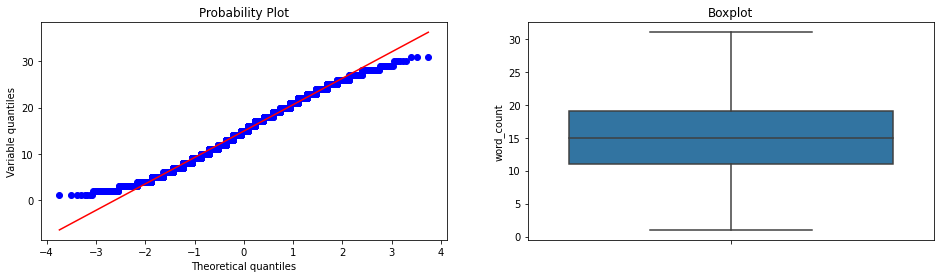

******* char_count *******


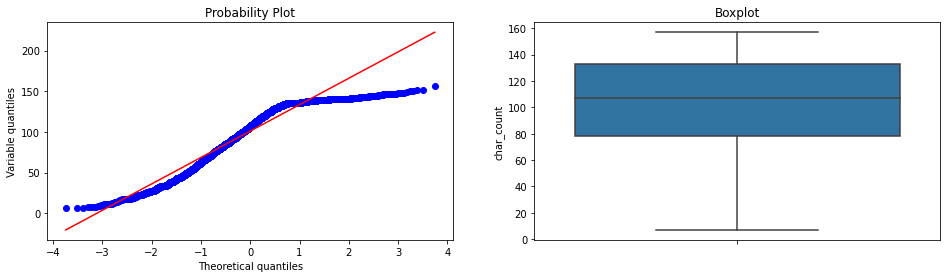

******* stop_word_count *******


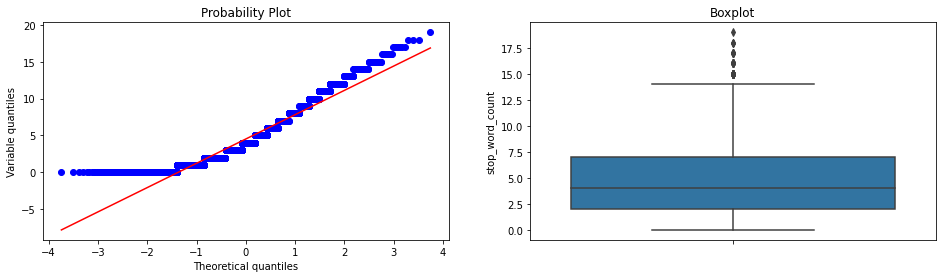

******* unique_word_count *******


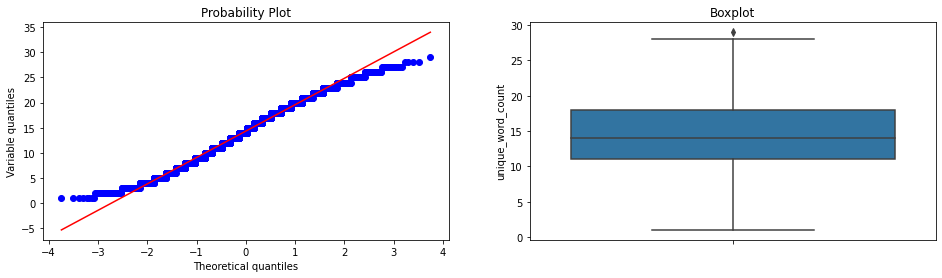

******* average_word_length *******


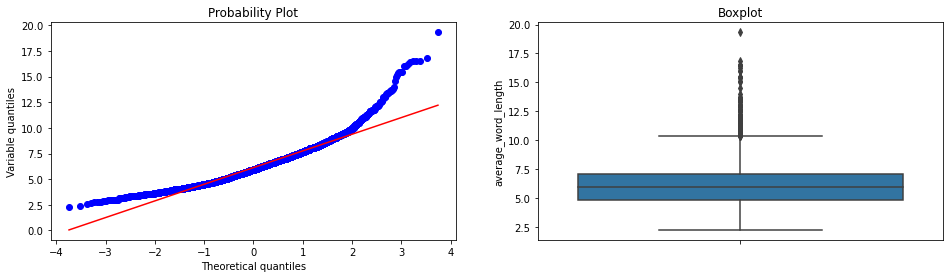

******* hashtag_count *******


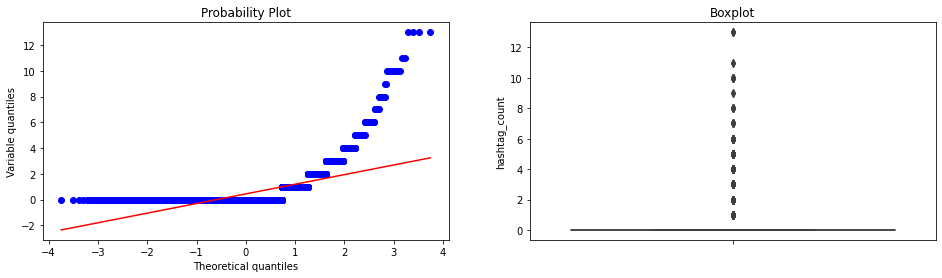

******* mention_count *******


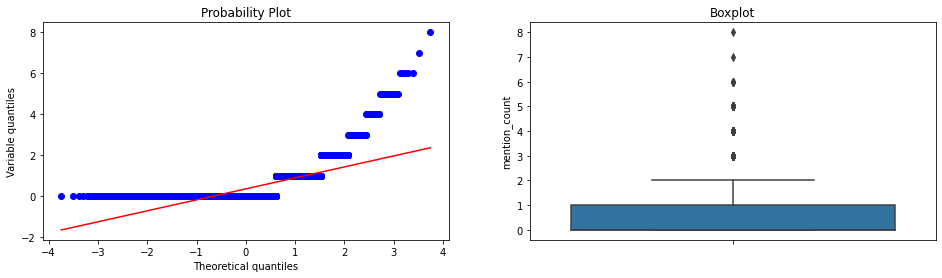

In [30]:

num_var = ["word_count","char_count","stop_word_count","unique_word_count","average_word_length","hashtag_count","mention_count"]
for var in num_var:
    print("******* {} *******".format(var))
    diagnostic_plots(train, var)

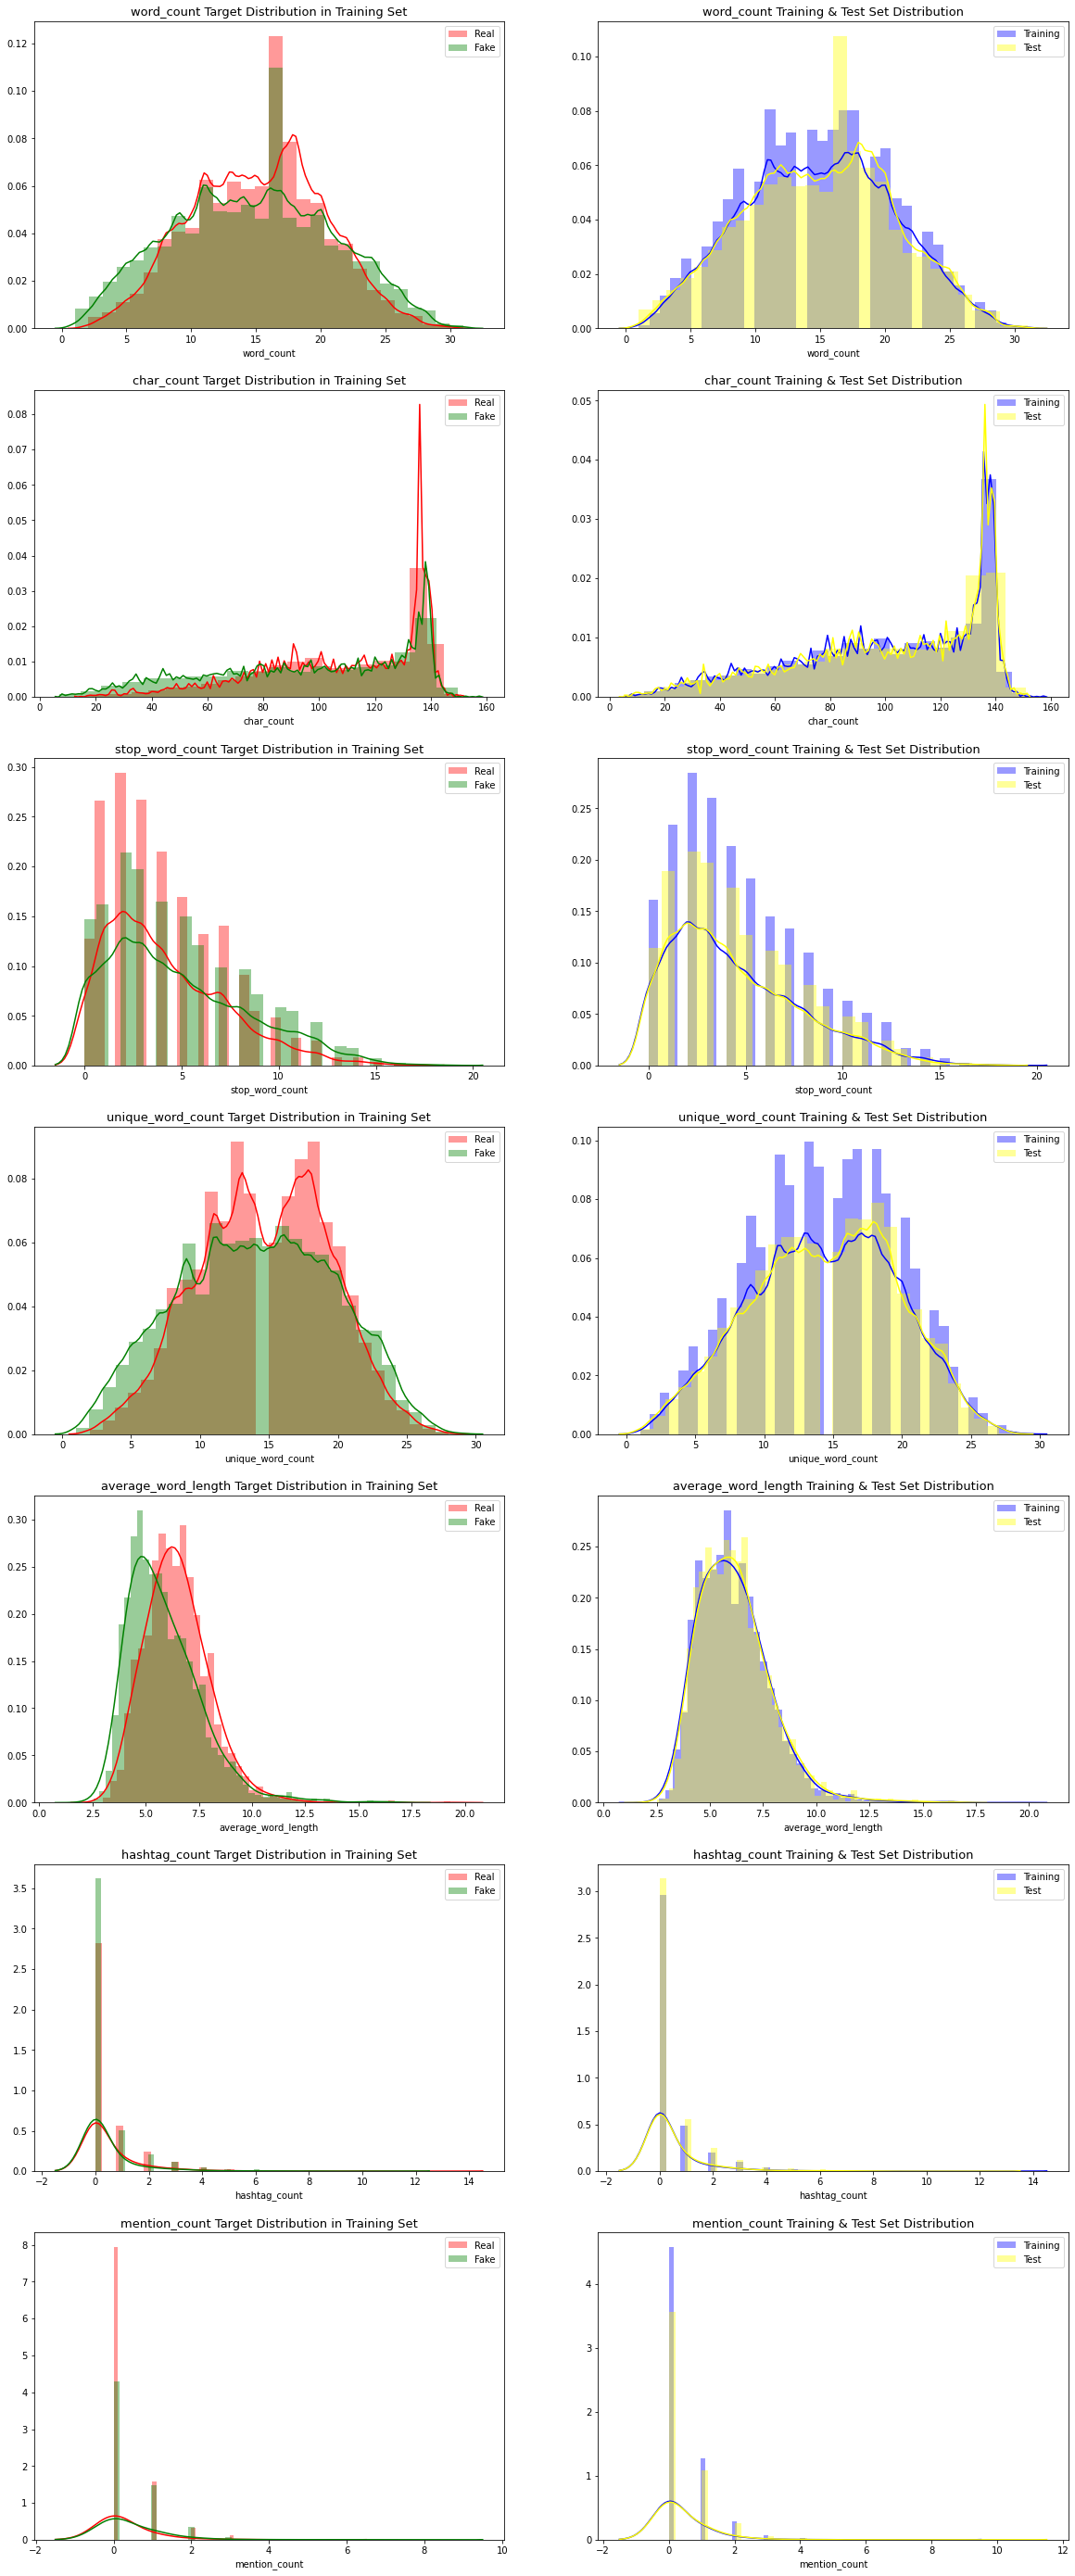

In [31]:
num_var = ["word_count","char_count","stop_word_count","unique_word_count","average_word_length","hashtag_count","mention_count"]
real = train['target'] == 1
fig, axes = plt.subplots(nrows=len(num_var), ncols = 2, figsize = (20,50))
for index, feature in enumerate(num_var):
    sns.distplot(train.loc[real][feature], label = 'Real', ax = axes[index][0], color = 'red',kde_kws={'bw': .5})
    sns.distplot(train.loc[~real][feature], label = 'Fake', ax = axes[index][0], color = 'green',kde_kws={'bw': .5})
    sns.distplot(train[feature], label = 'Training', ax = axes[index][1], color = 'blue',kde_kws={'bw': .5})
    sns.distplot(test[feature], label = 'Test', ax = axes[index][1], color = 'yellow',kde_kws={'bw': .5})
    for j in range(2):
        axes[index][j].set_label(" ")
        axes[index][j].legend()
    axes[index][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[index][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)
    
plt.show()

1. Similiar Dist.: mention_count, hashtag_count (for both [train,test] and [real,fake])
2. Similiar Dist: all features in train and test sets
3. Different Dist: word_count,char_count,stop_word_count,average_word_length, unique_word_count

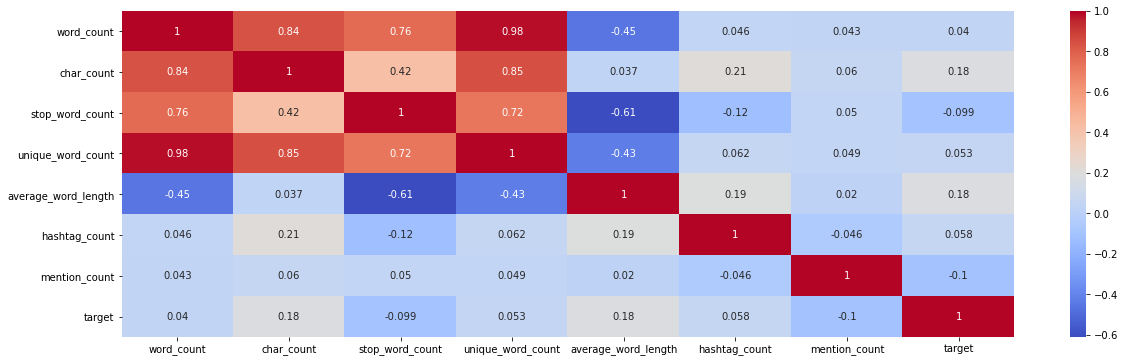

In [32]:
#coorelation heatmap
plt.figure(figsize=(20,6))
num_vars = ["word_count","char_count","stop_word_count","unique_word_count","average_word_length","hashtag_count","mention_count","target"]
sns.heatmap(train[num_vars].corr(),cmap="coolwarm", annot=True)

In [33]:
stoplist = set(stopwords.words('english'))
print(len(stoplist))

179


In [34]:
stop_fake = defaultdict(int)
for words in train[train['target'] == 0]['text'].str.split():
    for word in words:
        if word in stoplist:
            stop_fake[word] += 1


In [35]:
stop_fake_15 = sorted(stop_fake.items(), key = lambda x: x[1], reverse = True)[:15]

In [36]:
stop_real = defaultdict(int)
for words in train[train['target'] == 1]['text'].str.split():
    for word in words:
        if word in stoplist:
            stop_real[word] += 1
stop_real_15 = sorted(stop_real.items(), key = lambda x: x[1], reverse = True)[:15]

Text(0.5, 0.98, 'Stop Word Dist.')

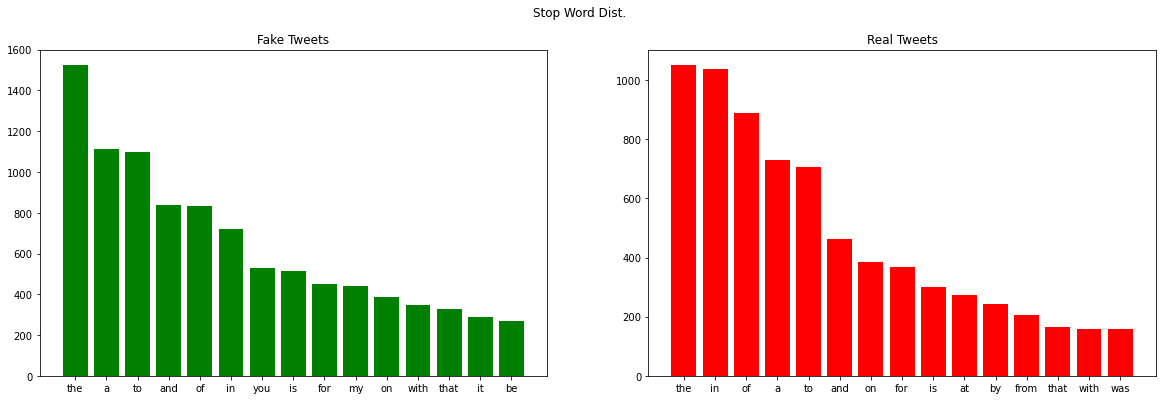

In [37]:
fig,(plt1,plt2) = plt.subplots(1,2, figsize = (20,6))
x_fake, y_fake = zip(*stop_fake_15)
plt1.bar(x_fake,y_fake, color = "green")
x_real, y_real = zip(*stop_real_15)
plt2.bar(x_real,y_real, color = "red")
plt1.set_title("Fake Tweets")
plt2.set_title("Real Tweets")
fig.suptitle("Stop Word Dist.")

In [38]:
import string

Analyzing punctuation dist. in real and fake tweets

In [39]:
punc_real = defaultdict(int)
for words in train[train['target'] == 1]['text'].str.split():
    for word in words:
        if word in string.punctuation:
            punc_real[word] += 1

In [40]:
punc_real_15 = sorted(punc_real.items(), key = lambda x: x[1], reverse = True)

In [41]:
punc_fake = defaultdict(int)
for words in train[train['target'] == 0]['text'].str.split():
    for word in words:
        if word in string.punctuation:
            punc_fake[word] += 1
punc_fake_15 = sorted(punc_fake.items(), key = lambda x: x[1], reverse = True)

Text(0.5, 0.98, 'Stop Word Dist.')

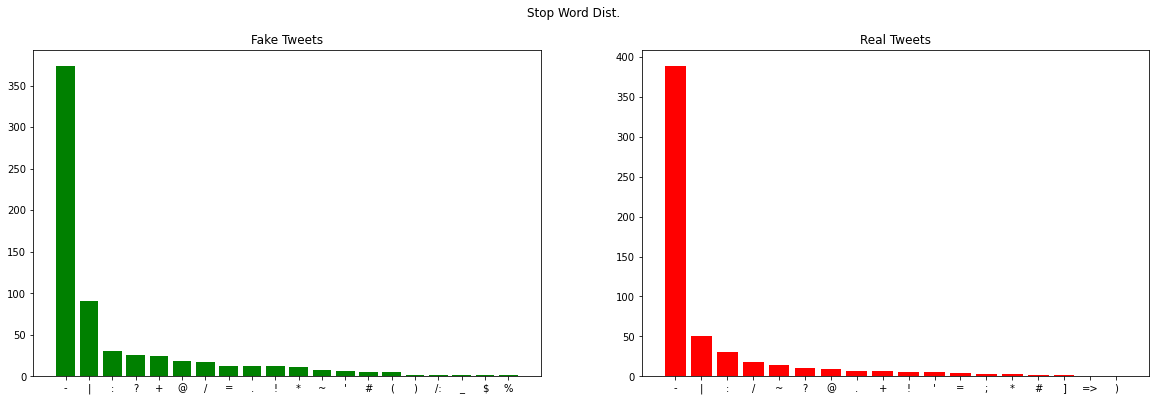

In [42]:
fig,(plt1,plt2) = plt.subplots(1,2, figsize = (20,6))
x_fake, y_fake = zip(*punc_fake_15)
plt1.bar(x_fake,y_fake, color = "green")
x_real, y_real = zip(*punc_real_15)
plt2.bar(x_real,y_real, color = "red")
plt1.set_title("Fake Tweets")
plt2.set_title("Real Tweets")
fig.suptitle("Stop Word Dist.")

**Data Cleaning**

In [43]:
df = pd.concat([train,test])
print(df.shape)

(10876, 13)


In [44]:

from bs4 import BeautifulSoup
import re

**Contractions**

In [45]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}


In [46]:
c_re = re.compile(r'\b(?:%s)\b' % '|'.join(cList.keys()))
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())


In [47]:
print(expandContractions('Don\'t you get it?'))
print(expandContractions('You\'ve got serious cojones coming in here like that.'))


do not you get it?
you have got serious cojones coming in here like that.


In [48]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
c_re = re.compile(r'\b(?:%s)\b' % '|'.join(cList.keys()))
def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text.lower())
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def denoise_text(text):
    text = expandContractions(text)
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_punct(text)
    text = remove_emoji(text)
    return text

In [49]:
print(denoise_text('You\'ve got [serious] cojones coming in here like that.<html> ##?@[]'))

you have got  cojones coming in here like that 


In [50]:
df = pd.concat([train,test])
print("Data Frame shape: {}".format(df.shape))

Data Frame shape: (10876, 13)


In [51]:
df.isnull().sum()

id                        0
keyword                  87
location               3638
text                      0
target                 3263
keyword_mean           3324
word_count                0
char_count                0
stop_word_count           0
unique_word_count         0
hashtag_count             0
mention_count             0
average_word_length       0
dtype: int64

In [52]:
df.drop(['keyword','location','keyword_mean'],axis = 1, inplace = True)
print("Data Frame shape: {}".format(df.shape))

Data Frame shape: (10876, 10)


In [53]:
df.drop('id',axis = 1, inplace = True)

In [54]:
df.head()

,text,target,word_count,char_count,stop_word_count,unique_word_count,hashtag_count,mention_count,average_word_length
0,Our Deeds are the Reason of this #earthquake M...,1.0,13,69,6,13,1,0,4.384615
1,Forest fire near La Ronge Sask. Canada,1.0,7,38,0,7,0,0,4.571429
2,All residents asked to 'shelter in place' are ...,1.0,22,133,11,20,0,0,5.090909
3,"13,000 people receive #wildfires evacuation or...",1.0,8,65,1,8,1,0,7.125000
4,Just got sent this photo from Ruby #Alaska as ...,1.0,16,88,7,15,2,0,4.500000


In [55]:
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word,'v')for word in x.split()]))
df['text'] = df['text'].apply(lambda x: denoise_text(x))

In [56]:
df.head()

,text,target,word_count,char_count,stop_word_count,unique_word_count,hashtag_count,mention_count,average_word_length
0,our deeds be the reason of this earthquake may...,1.0,13,69,6,13,1,0,4.384615
1,forest fire near la ronge sask canada,1.0,7,38,0,7,0,0,4.571429
2,all residents ask to shelter in place be be no...,1.0,22,133,11,20,0,0,5.090909
3,13000 people receive wildfires evacuation orde...,1.0,8,65,1,8,1,0,7.125000
4,just get send this photo from ruby alaska as s...,1.0,16,88,7,15,2,0,4.500000


In [57]:
embedding_dict={}
with open('../input/glove-global-vectors-for-word-representation/glove.6B.200d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [58]:
print('Loaded %s word vectors.' % len(embedding_dict))

Loaded 400000 word vectors.


In [59]:
corpus = []
for tweet in tqdm(df['text']):
    words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stoplist))]
    corpus.append(words)

In [60]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [61]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 20221


In [62]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,200))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

In [63]:
train.shape, test.shape,df.shape

((7613, 13), (3263, 11), (10876, 9))

In [64]:
train_1=tweet_pad[:train.shape[0]]
test_1=tweet_pad[train.shape[0]:]

In [65]:
train.shape,test.shape

((7613, 13), (3263, 11))

In [66]:
train_1_df = pd.DataFrame(train_1)
test_1_df = pd.DataFrame(test_1)

In [67]:
train_1_df['word_count'] = train['word_count']
test_1_df['word_count'] = test['word_count']

train_1_df['char_count'] = train['char_count']
test_1_df['char_count'] = test['char_count']

train_1_df['stop_word_count'] = train['stop_word_count']
test_1_df['stop_word_count'] = test['stop_word_count']

train_1_df['unique_word_count'] = train['unique_word_count']
test_1_df['unique_word_count'] = test['unique_word_count']

train_1_df['hashtag_count'] = train['hashtag_count']
test_1_df['hashtag_count'] = test['hashtag_count']

train_1_df['mention_count'] = train['mention_count']
test_1_df['mention_count'] = test['mention_count']

train_1_df['average_word_length'] = train['average_word_length']
test_1_df['average_word_length'] = test['average_word_length']

In [68]:
X_train,X_val,y_train,y_val=train_test_split(train_1_df,train['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_val.shape)

Shape of train (6471, 57)
Shape of Validation  (1142, 57)


In [69]:
def get_f1(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [70]:
model_bdlstm=Sequential()
e=Embedding(num_words,200,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)
model_bdlstm.add(e)
model_bdlstm.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
model_bdlstm.add(BatchNormalization())
model_bdlstm.add(Dense(1, activation = "sigmoid"))
model_bdlstm.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[get_f1])

In [72]:
model_bdlstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 200)           4044400   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               240800    
_________________________________________________________________
batch_normalization (BatchNo (None, 200)               800       
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 4,286,201
Trainable params: 241,401
Non-trainable params: 4,044,800
_________________________________________________________________


In [73]:
hist=model_bdlstm.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
102/102 [==============================] - 43s 425ms/step - loss: 0.5290 - get_f1: 0.7080 - val_loss: 0.5522 - val_get_f1: 0.6459
Epoch 2/20
102/102 [==============================] - 43s 417ms/step - loss: 0.4445 - get_f1: 0.7528 - val_loss: 0.5054 - val_get_f1: 0.7386
Epoch 3/20
102/102 [==============================] - 41s 401ms/step - loss: 0.4226 - get_f1: 0.7617 - val_loss: 0.4754 - val_get_f1: 0.7563
Epoch 4/20
102/102 [==============================] - 43s 418ms/step - loss: 0.3954 - get_f1: 0.7826 - val_loss: 0.4761 - val_get_f1: 0.7435
Epoch 5/20
102/102 [==============================] - 42s 412ms/step - loss: 0.3864 - get_f1: 0.7895 - val_loss: 0.4638 - val_get_f1: 0.7405
Epoch 6/20
102/102 [==============================] - 41s 406ms/step - loss: 0.3621 - get_f1: 0.7998 - val_loss: 0.4829 - val_get_f1: 0.7517
Epoch 7/20
102/102 [==============================] - 42s 410ms/step - loss: 0.3442 - get_f1: 0.8137 - val_loss: 0.5064 - val_get_f1: 0.7107
Epoch 8/20
10

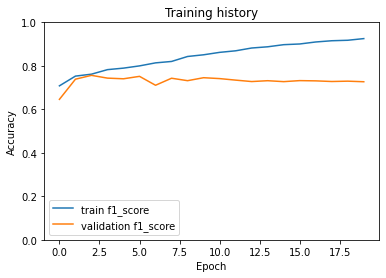

In [74]:
plt.plot(hist.history['get_f1'], label='train f1_score')
plt.plot(hist.history['val_get_f1'], label='validation f1_score')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [75]:
y_pred_val = model_bdlstm.predict_classes(X_val)

In [76]:
accuracy_bilstm= accuracy_score(y_pred_val,y_val)

In [77]:
print("The accuracy for the Bidirectional Lstm model is {} %".format(accuracy_bilstm*100))

The accuracy for the Bidirectional Lstm model is 79.42206654991243 %


In [78]:
sample_sub=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
y_pred_bdlstm=model_bdlstm.predict_classes(test_1_df)
y_pred_bdlstm=np.round(y_pred_bdlstm).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pred_bdlstm})
sub.to_csv('submission_bdlstm.csv',index=False)

In [79]:
model_gru=Sequential()
e=Embedding(num_words,200,embeddings_initializer=Constant(embedding_matrix),
                   input_length=MAX_LEN,trainable=False)
model_gru.add(e)
model_gru.add(SpatialDropout1D(0.3))
model_gru.add(GRU(200))
model_gru.add(Dense(1, activation = "sigmoid"))
model_gru.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=[get_f1])

In [80]:
hist=model_gru.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
102/102 [==============================] - 1s 11ms/step - loss: 0.6635 - get_f1: 0.4582 - val_loss: 0.6438 - val_get_f1: 0.4736
Epoch 2/20
102/102 [==============================] - 1s 7ms/step - loss: 0.6498 - get_f1: 0.5063 - val_loss: 0.6394 - val_get_f1: 0.6032
Epoch 3/20
102/102 [==============================] - 1s 9ms/step - loss: 0.6404 - get_f1: 0.5275 - val_loss: 0.6296 - val_get_f1: 0.5660
Epoch 4/20
102/102 [==============================] - 1s 7ms/step - loss: 0.6340 - get_f1: 0.5394 - val_loss: 0.6269 - val_get_f1: 0.5523
Epoch 5/20
102/102 [==============================] - 1s 8ms/step - loss: 0.6264 - get_f1: 0.5467 - val_loss: 0.6289 - val_get_f1: 0.5795
Epoch 6/20
102/102 [==============================] - 1s 7ms/step - loss: 0.6198 - get_f1: 0.5664 - val_loss: 0.6231 - val_get_f1: 0.5091
Epoch 7/20
102/102 [==============================] - 1s 7ms/step - loss: 0.6072 - get_f1: 0.5716 - val_loss: 0.6315 - val_get_f1: 0.6119
Epoch 8/20
102/102 [=============

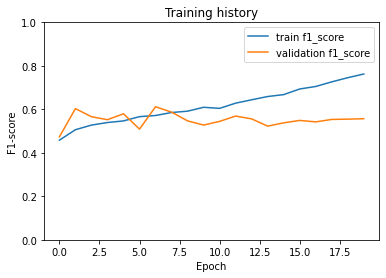

In [81]:
plt.plot(hist.history['get_f1'], label='train f1_score')
plt.plot(hist.history['val_get_f1'], label='validation f1_score')
plt.title('Training history')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [82]:
sample_sub=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
y_pred_gru=model_gru.predict_classes(test_1_df)
y_pred_gru=np.round(y_pred_gru).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pred_gru})
sub.to_csv('submission_gru.csv',index=False)

In [83]:
y_pred_val = model_gru.predict_classes(X_val)
accuracy_gru= accuracy_score(y_pred_val,y_val)
print("The accuracy for the GRU model is {} %".format(accuracy_gru*100))

The accuracy for the GRU model is 63.04728546409807 %


In [84]:
from keras.layers import Layer
import keras.backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [85]:
import keras
max_length = 57
inputs=keras.Input(shape=(max_length,))
x=(e)(inputs)
att_in=LSTM(100,return_sequences=True,dropout=0.3,recurrent_dropout=0.2)(x)
att_out=attention()(att_in)
outputs=Dense(1,activation='sigmoid',trainable=True)(att_out)
modelA=Model(inputs,outputs)
modelA.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 57)]              0         
_________________________________________________________________
embedding_1 (Embedding)      multiple                  4044400   
_________________________________________________________________
lstm_1 (LSTM)                (None, 57, 100)           120400    
_________________________________________________________________
attention (attention)        (None, 100)               157       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 4,165,058
Trainable params: 120,658
Non-trainable params: 4,044,400
_________________________________________________________________


In [86]:
modelA.compile(loss='binary_crossentropy', optimizer='adam', metrics=[get_f1])

In [87]:
hist=modelA.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
102/102 [==============================] - 21s 209ms/step - loss: 0.5213 - get_f1: 0.6045 - val_loss: 0.5004 - val_get_f1: 0.7284
Epoch 2/20
102/102 [==============================] - 22s 218ms/step - loss: 0.4479 - get_f1: 0.7409 - val_loss: 0.4779 - val_get_f1: 0.7074
Epoch 3/20
102/102 [==============================] - 21s 205ms/step - loss: 0.4349 - get_f1: 0.7525 - val_loss: 0.4615 - val_get_f1: 0.7494
Epoch 4/20
102/102 [==============================] - 21s 202ms/step - loss: 0.4186 - get_f1: 0.7686 - val_loss: 0.4566 - val_get_f1: 0.7470
Epoch 5/20
102/102 [==============================] - 22s 217ms/step - loss: 0.4056 - get_f1: 0.7691 - val_loss: 0.4733 - val_get_f1: 0.7532
Epoch 6/20
102/102 [==============================] - 21s 203ms/step - loss: 0.3983 - get_f1: 0.7770 - val_loss: 0.4568 - val_get_f1: 0.7619
Epoch 7/20
102/102 [==============================] - 21s 204ms/step - loss: 0.3916 - get_f1: 0.7837 - val_loss: 0.4608 - val_get_f1: 0.7562
Epoch 8/20
10

In [88]:
y_pred_val = modelA.predict(X_val)

In [89]:
for i in range(len(y_pred_val)):
    if (y_pred_val[i]>=0.5):
        y_pred_val[i]=1
    else:
        y_pred_val[i]=0

In [90]:
accuracy_attention = accuracy_score(y_pred_val,y_val)
print("The accuracy for the attention model is {} %".format(accuracy_attention*100))

The accuracy for the attention model is 77.75831873905429 %


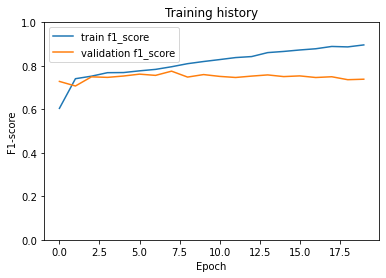

In [91]:
plt.plot(hist.history['get_f1'], label='train f1_score')
plt.plot(hist.history['val_get_f1'], label='validation f1_score')
plt.title('Training history')
plt.ylabel('F1-score')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [72]:
def find_best_model(X, Y, tqdm=tqdm):
    
    algos = {
            'Logistic_Reg': {
                'model': LogisticRegression(random_state=42),
                'params':{
                    'C':[0.0001, 0.001,0.01, 0.1, 1 , 10, 100],
                    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                }
            },
#             'XGB': {
#                 'model': XGBClassifier(random_state=42),
#                 'params': {
#                    'n_estimators' :[25,50,100],
#                    'learning_rate': [0.0001, 0.001, 0.01, 0.1],
#                    'gamma':[0.5, 0.1, 1, 10],
#                    'max_depth':[5, 10, 15]
#                 }
#             },
            'LGBM': {
                'model': LGBMClassifier(random_state=42),
                'params':{
                    'max_depth': [7,8,9,10,11],
                    'min_child_weight': [5,6,7,8],
                    'learning_rate': [0.1,0.05,0.001],
                    'n_estimators': [1500]
                }
            },
            
            'SVC': {
                'model': SVC(random_state=42),
                'params': {
                    'C':[0.0001, 0.001,0.01, 0.1, 1 , 10, 100]
                }
            },
            'KNN' :{
                'model': KNeighborsClassifier(),
                'params': {
                    'weights': ['uniform','distance']
                }
            },
            
          'Extra_Randomized_tree': {
              'model': ExtraTreesClassifier(),
              'params': {
                  'n_estimators':[10,20, 50, 100],
                  'max_depth':[4, 6, 10, 15, 20, 50]
              }
          }
#           'RandomForest':{
#               'model': RandomForestClassifier(),
#                 'params': {
#                   'criterion' : ['gini', 'entropy'],
#                    'n_estimators': [100,300,500],
#               }
#           },
#         'XGBoost':{
#             'model': XGBClassifier(),
#             'params': {
#                 'max_depth': [7,8,9,10,11],
#                 'min_child_weight': [5,6,7,8],
#                 'learning_rate': [0.1,0.05,0.001],
#                 'n_estimators': [1500]
#             }
#         }
  
        
    }
    values = (algos.items())
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    print(f'Grid Search CV Initiated..' )    
    with tqdm(total=len(values), file=sys.stdout) as pbar:
        for algo_name, config in algos.items():
            pbar.set_description('Processed')
            gs =  GridSearchCV(config['model'], config['params'], cv=cv, scoring='f1',return_train_score=False)
            gs.fit(X,Y)
            scores.append({
                'model': algo_name,
                'best_score': gs.best_score_,
                'best_params': gs.best_params_
            })
            pbar.update(1)
            print(f'Grid search CV for {algo_name} done')
        print("Grid Search CV completed!")
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [73]:
result = find_best_model(train_1_df,train['target'])

Grid Search CV Initiated..


/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:426: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not co

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ di

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not co

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Grid search CV for Logistic_Reg done
Grid search CV for LGBM done
Grid search CV for SVC done
Grid search CV for KNN done
Grid search CV for Extra_Randomized_tree done
Grid Search CV completed!



In [79]:
result

,model,best_score,best_params
0,Logistic_Reg,0.581783,"{'C': 0.0001, 'solver': 'liblinear'}"
1,LGBM,0.625756,"{'learning_rate': 0.1, 'max_depth': 7, 'min_ch..."
2,SVC,0.491666,{'C': 100}
3,KNN,0.499782,{'weights': 'distance'}
4,Extra_Randomized_tree,0.606728,"{'max_depth': 20, 'n_estimators': 50}"


In [78]:
a = np.array(result[result.model == 'LGBM']['best_params'])
a

array([{'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 7, 'n_estimators': 1500}],
      dtype=object)

In [92]:
model_log_reg = LogisticRegression(C = 0.0001, solver = 'liblinear')
model_log_reg.fit(X_train,y_train)
y_pred_log = model_log_reg.predict(X_val)
print(accuracy_score(y_pred_log,y_val)*100)

67.51313485113836


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [96]:
model_lgbm = LGBMClassifier(learning_rate=0.001, max_depth=7,min_child_weight=7,
                 n_estimators=1500)
model_lgbm.fit(X_train,y_train)
y_pred_lgbm = model_lgbm.predict(X_val)
print(accuracy_score(y_pred_lgbm,y_val)*100)

70.40280210157619


In [101]:
model_ERT = ExtraTreesClassifier(max_depth=25,
                                n_estimators = 1500)
model_ERT.fit(X_train,y_train)
y_pred_ERT = model_ERT.predict(X_val)
print(accuracy_score(y_pred_ERT,y_val)*100)

70.75306479859896


In [102]:
model_xgb = XGBClassifier(max_depth=9,min_child_weight=9,
                         learning_rate = 0.001,n_estimators=1500)

model_xgb.fit(X_train,y_train)
y_pred_xgb = model_xgb.predict(X_val)
print(accuracy_score(y_pred_xgb,y_val)*100)

70.66549912434326


In [103]:
y_pred_attention = modelA.predict(test_1_df)
for i in range(len(y_pred_attention)):
    if (y_pred_attention[i]>=0.5):
        y_pred_attention[i]=1
    else:
        y_pred_attention[i]=0
y_pred_bdlstm = model_bdlstm.predict_classes(test_1_df)
y_pred_lgbm = model_lgbm.predict(test_1_df)
y_pred_ert = model_ERT.predict(test_1_df)
y_pred_xgb = model_xgb.predict(test_1_df)

In [193]:
y_pred_model = np.array((y_pred_bdlstm)*0.5 + (0.5*(y_pred_attention)))
y_pred_model

array([[0.5],
       [1. ],
       [1. ],
       ...,
       [1. ],
       [1. ],
       [1. ]])

In [179]:
y_pred_final_df['num'] = [1 if num >= 0.5 else 0 for num in y_pred_final_df['num']]

In [180]:
y_pred_final = np.array(y_pred_final_df['num'])

In [194]:
sample_sub=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

y_pred_model=np.round(y_pred_model).astype(int).reshape(3263)
sub=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':y_pred_model})
sub.to_csv('submission.csv',index=False)